# Histogram
I denna notebook introducerar vi enklare verktyg för att plotta histogram med Python.

Från tidigare mätdata på periodtider för belastade fjädrar kan vi bestämma fjäderkonstanten $k$. Dessa mätdata fungerar som basen för vår statistiska analys.

### Format på mätdata
För all datainsamling och mätvärdesbehandling är val av dataformat en viktig parameter. Här har vi valt att sammanställa alla mätningar i en CSV-fil, d.v.s. en textfil med alla värden separerade med ett skiljetecken. I ursprungsdefinitionen av CSV-formatet används kommatecken, därav namnet "comma separated values", CSV. Kommatecken används dock som decimaltecken i många språk, inklusive svenska så ofta används semikolon eller tab som avskiljare i CSV-filer. 

Den data som används här har exporterats från ett gemensamt kalkylblad och innehåller alla mätningar från tidigare mättillfälle enligt följande format: 

``` Massa; Periodtid; Grupp; Perioder ```

Där `Massa` är massan i gram, `Periodtid` den uppmätta periodtiden medans `Grupp` betecknar vilken studentgrupp som utförde mätningen och `Perioder` ger antalet perioder som periodtiden medelvärdesbildades över.

CSV-filen som används här finns lagrad i länken nedan.

In [1]:
dataurl='https://raw.githubusercontent.com/anbergman/expmet/main/Fjadergenererad.csv'

***
### Initialisering
Först laddar vi in de bibliotek som ska användas. Nedan ges exempel på flera sätt som histogram kan ritas upp. För att kunna använda dem alla behöver vi importera `numpy` för grundläggande matematiska operationer, `matplotlib` för plottning, `pandas` för en alternativ hantering av data och `seaborn` för ytterligare statistiska plottar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Figursättning
För läsbara figurer behöver ofta egenskaperna för `matplotlib` ändras på detaljnivå. Ett vanligt problem är att fontstorlek inte skalar med figurstorlek vilket gör att legender och axlar blir svåra att utläsa när figurer skapas i en hög upplösning för att sedan infogas i ett dokument med mindre skala. Därför är det en bra vana att alltid ha några rader som nedan där grundinställningar snabbt kan ändras för alla figurer. 

In [3]:
# Import resource control for matplotlib
from matplotlib import rc

# Define general font properties
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 18}

# Define default figure size
figure = {'figsize' : [12,6] }

# Apply the font and figure properties as default (for this session)
rc('font', **font) 
rc('figure', **figure) 

***
# Histogram med numpy.histogram
Det finns många sätt att beräkna och plotta histogram i Python. Vilket alternativ som är bäst beror ofta på vilken balans mellan användarvänlighet och kontroll som önskas. Här går vi först igenom hur `numpy` kan användas för att läsa in och processa mätdatan. Fördelen med `numpy` är att biblioteket har gott om grundläggande funktionaliteter och är relativt intuitivt att använda. Tyvärr kan matrishantering i `numpy` dock ofta uppfattas som klumpigt. 

### Inläsning
Först läses all mätdata in enligt formatet ovan. Här anges att semikolon används som avskiljare och att den första raden i filen hoppas över då den innehåller rubriker för kolumnerna och inte mätdata. Resultatet blir en tvådimensionell array `indata`.

In [4]:
# Read CSV file for all T measurements
indata=np.genfromtxt(dataurl,delimiter=';',skip_header=1)

### Beräkning
Därefter beräknas fjäderkonstanten $k$ från de inlästa periodtiderna och massorna. Här används formeln 
\begin{align}
 k&=\frac{4\pi^2 m}{T^2} \\
\end{align}

Vi extraherar även varje kolumn i matrisen `indata` för att tydligöra vad de innehåller. De beräknade fjäderkonstanterna sparas i vektorn `spring_constant`.

In [5]:
# Mass
massa=indata[:,0]/1000.0
# Period
periodtid=indata[:,1]
# Student group
grupp=indata[:,2]
# Number of periods for average (1=T, 10=Tau)
perioder=indata[:,3]

# Auxilliary logical array which is True if the measurement is of Tau and False if it is for T.
tau=perioder==10

# Resulting spring constant
spring_constant=4.0*np.pi**2*massa/periodtid**2

### Tau eller T
För att enklare skilja på mätningarna av $k$ från enstaka periodtider $T$ eller medelvärdesbildade periodtider $\tau$ skapar vi två separata vektorer `k_T` för $k_T$ och `k_\tau` för $k_\tau$.

In [6]:
# Extract k_tau and k_T based from a boolean mask with the auxilliary logical array tau.
k_T=spring_constant[tau==False]
k_Tau=spring_constant[tau==True]

### Visualisering av mätdatan : Serie
För att få en första överblick av den uppmätta fjäderkonstanten $k$ plottas serierna av $k_T$ och $k_\tau$ i samma figur. Notera att här ges x-axeln av mätningsindex så informationen i figuren är svåranalyserad.

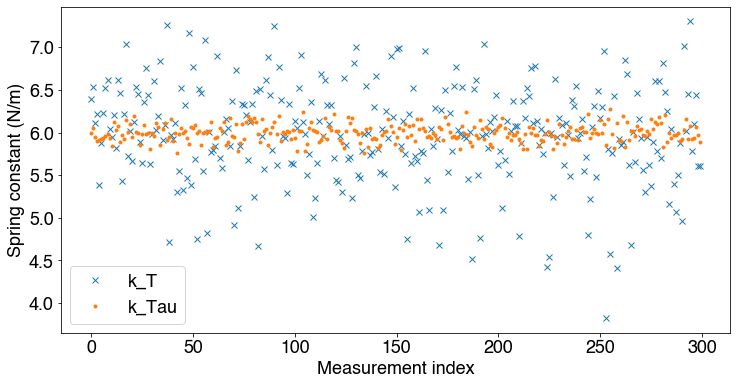

In [7]:
# Plot the time series of k_T 
plt.figure()
plt.plot(k_T,'x',label='k_T')
plt.plot(k_Tau,'.',label='k_Tau')

# Give a legend
plt.legend()

# Define the y-axis
plt.ylabel('Spring constant (N/m)')

# Define the x-axis
plt.xlabel('Measurement index')
plt.show()


***
#### numpy.histogram()
Använder man numpys histogramfunktion `numpy.histogram()` beräknas histogrammet istället för att plottas. Resultatet som funktionen returnerar kan därför efterbehandlas och ritas upp på egen hand.
Den grundläggande syntaxen är: 

```hist, bin_edges = np.histogram(data,kwargs)```

där `hist` innehåller antal träffar i varje intervall och `bin_edges` kanterna för intervallen. `kwargs` används för att kontrollera hur histogrammet skapas. Även här kan man ange antal intervall med `bins` och beräkna sannolikhetstäthetsfunktionen med `density=True`.

Se mer på [https://numpy.org/doc/stable/reference/generated/numpy.histogram.html](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

In [8]:
# Set number of bins
nbins=40

# Calculate the histogram for nbins 
hist, bin_edges = np.histogram(k_Tau, density=False, bins=nbins)

# Calculate the histogram for nbins 
hist_T, bin_edges_T = np.histogram(k_T, density=False, bins=nbins)


# Extract the bin width
bin_width = bin_edges[1]-bin_edges[0]
bin_width_T = bin_edges_T[1]-bin_edges_T[0]

Det beräknade histogrammet kan sedan plottas t.ex. som ett stapeldiagram med `pyplot.bar`.

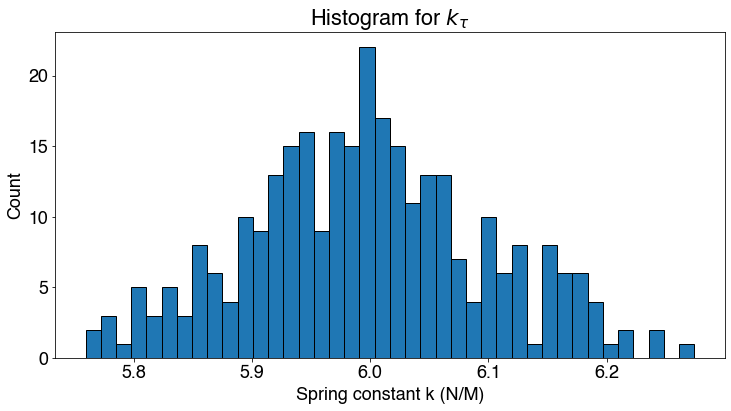

In [9]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges[:-1],hist,bin_width,align='edge',edgecolor='Black')

# Define axes and labels
plt.title(r'Histogram for $k_\tau$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')

# Show the figure
plt.show()

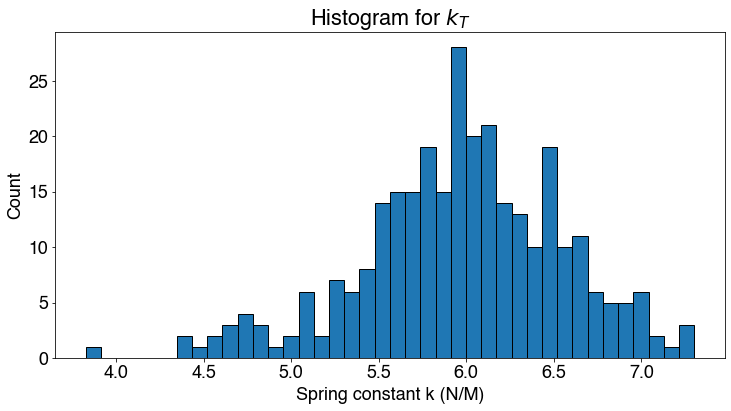

In [10]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges_T[:-1],hist_T,bin_width_T,align='edge',edgecolor='Black')

# Define axes and labels
plt.title(r'Histogram for $k_T$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')

# Show the figure
plt.show()

Nedan visas hur den utökade kontrollen med `numpy.histogram()` kan användas för att variera figurernas utseende. Här plottas histogrammen för $k_T$ och $k_\tau$ i samma figur med olika färg och genomskinlighet.


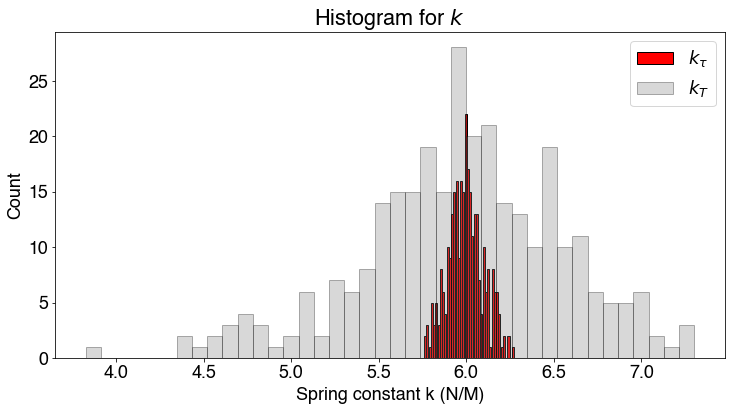

In [11]:
# Initialize figure
plt.figure()

# Plot bar diagram with thinner bins, colored faces and black edge colors.
plt.bar(bin_edges[:-1],hist,bin_width*0.9,align='edge',color='Red',edgecolor='Black',label=r'$k_\tau$')
plt.bar(bin_edges_T[:-1],hist_T,bin_width_T,align='edge',color='Gray',edgecolor='Black',alpha=0.3,label=r'$k_T$')


# Define axes and labels
plt.title(r'Histogram for $k$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')
plt.legend()

# Show the figure
plt.show()

***
## Normal distributions
For comparison one can plot the normal distribution for a given $\sigma$ and $\mu$ alongside the histograms. Then the histograms need to be rescaled to density.

A normal distribution can be created as a normalized Gaussian as below:

In [52]:
x=np.linspace(4.0,7.0,100)
sigma=0.1
mu=6.0
sigma_T=1.0
gau=1.0/sigma/np.sqrt(2.0*np.pi)*np.exp(-0.5*((x-mu)/sigma)**2)
gau_T=1.0/sigma_T/np.sqrt(2.0*np.pi)*np.exp(-0.5*((x-mu)/sigma_T)**2)

A simple rescaling is all that is needed to convert the histogram from counts to density.

In [56]:
fk_fac=np.sum(hist)*bin_width
fk_fac_T=np.sum(hist_T)*bin_width_T

Then we can plot the density histograms alongside with the corresponding distributions. 

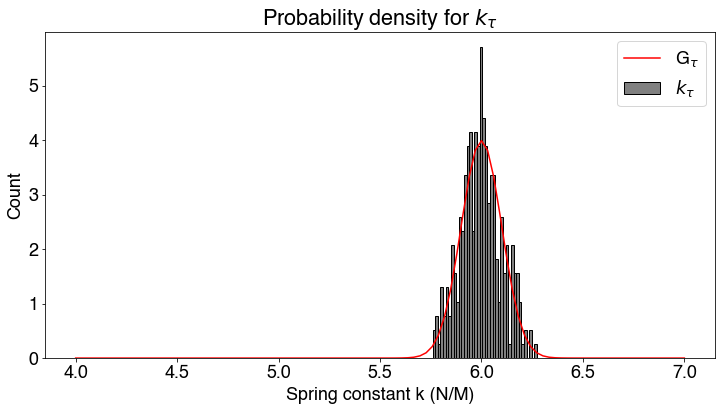

In [73]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges[:-1],hist/fk_fac,bin_width,align='edge',edgecolor='Black',color='grey',label=r'$k_\tau$')
plt.plot(x,gau,'r',label=r'G$_\tau$')

# Define axes and labels
plt.title(r'Probability density for $k_\tau$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')
plt.legend()

# Show the figure
plt.show()

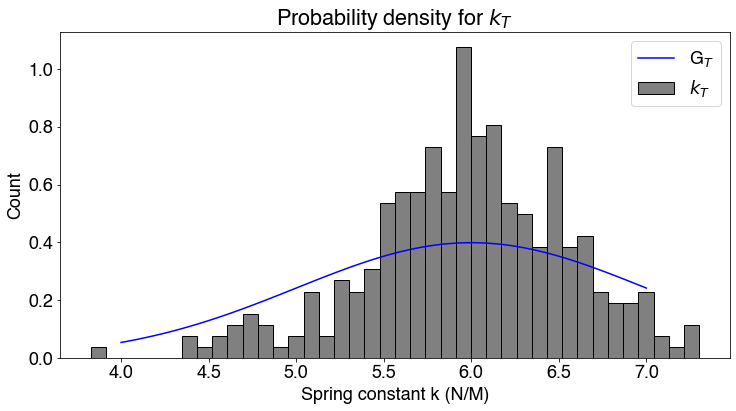

In [70]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges_T[:-1],hist_T/fk_fac_T,bin_width_T,align='edge',edgecolor='Black',color='Gray',label=r'$k_T$')
plt.plot(x,gau_T,'b',label='G$_T$')


# Define axes and labels
plt.title(r'Probability density for $k_T$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')
plt.legend()

# Show the figure
plt.show()